In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

# pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

plt.rc("font", family="Malgun Gothic")

In [2]:
df = pd.read_csv('data/public_data/train.csv')
test_df = pd.read_csv('data/private_data/private_data.csv')
df.head()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,15019.0,5475.0,92334.0,1704.0,6359.0,1331.0,40028.0,348.0,4374.9,13242.0,16550.5,2339.0,10528.0,1729.0,13885.0,804.0,3853.0,3703.0,15797.0,2576.0,14634.0,1474.0,30950.0,1621.0,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,141638.0,5210.0,994328.1,1716.0,262615.5,1212.0,1074699.1,345.0,122613.5,9923.0,427435.1,2153.0,82113.5,3960.0,558950.2,794.0,104930.3,4871.0,277326.5,2440.0,159800.0,1750.0,291057.0,1834.0,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,126207.8,5387.0,787716.0,1715.0,221850.5,1197.0,825681.9,350.0,79055.9,9529.0,334636.8,2220.0,80144.0,3333.0,444353.7,763.0,100699.5,5129.0,218465.2,2437.0,153084.0,1822.0,194626.5,1833.0,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


In [3]:
df.tail()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
1728,2020-09-24,목요일,1856965.0,1839.0,2055640.0,990.0,2281429.2,990.0,2818.4,19101.0,134359.9,4775.0,770271.0,2380.0,440799.7,1868.0,656500.5,1143.0,79508.0,10028.0,69843.5,6329.0,60020.8,4950.0,423233.2,1565.0,94152.5,9206.0,200810.1,2927.0,129997.7,2545.0,142487.0,5587.0,50730.0,4509.0,282212.3,3001.0,313139.7,3426.0,504242.6,3620.0,283196.9,10940.0
1729,2020-09-25,금요일,1880095.5,1789.0,1879261.0,1011.0,2074513.0,955.0,1887.1,23095.0,126926.0,5039.0,781384.8,2239.0,424009.4,2047.0,716803.2,1090.0,84842.0,10921.0,89315.4,6262.0,124693.1,2595.0,400527.2,1773.0,87127.3,9084.0,222932.0,2994.0,130379.3,2598.0,152575.5,5596.0,54322.0,4178.0,312214.8,2999.0,362741.0,3357.0,479683.1,3618.0,303779.6,10844.0
1730,2020-09-26,토요일,1661090.9,1760.0,1709385.7,1075.0,2089081.2,961.0,959.0,22510.0,110357.7,5565.0,810812.8,2126.0,414436.4,2095.0,502673.3,1326.0,99449.0,10607.0,124259.5,7123.0,75850.1,4310.0,187076.2,1405.0,102672.0,9198.0,249009.1,2942.0,130047.4,2617.0,176807.0,5262.0,61213.0,3770.0,327395.8,3065.0,390361.2,3092.0,521493.8,3691.0,313295.7,10636.0
1731,2020-09-27,일요일,25396.0,3066.0,38222.0,1139.0,18240.0,1056.0,60.0,22333.0,620.0,5227.0,18291.4,1866.0,4022.0,798.0,16573.0,998.0,2159.8,12195.0,1091.0,7178.0,676.0,1869.0,60.0,3750.0,0.0,0.0,4766.0,2946.0,2500.0,2573.0,910.0,3781.0,144.0,4076.0,285.0,3707.0,2464.0,3252.0,21717.0,3567.0,9734.0,10699.0
1732,2020-09-28,월요일,2405051.9,1867.0,2747519.5,1147.0,2235784.7,964.0,1630.6,22022.0,175584.1,4757.0,972402.9,2614.0,532361.5,2349.0,732005.3,1423.0,156779.7,11164.0,293159.8,8145.0,96162.5,7196.0,422012.6,2001.0,183983.8,9393.0,315101.7,3360.0,166041.5,3069.0,285116.5,5024.0,84155.0,4167.0,554862.6,2873.0,667745.0,2782.0,601841.0,3761.0,382263.4,10998.0


In [4]:
df.set_index('date',inplace=True)
df.drop('요일', axis=1, inplace=True)

In [5]:
df = df[[col for col in df.columns if '가격' in col]]
df = df.loc[(df!=0).any(axis=1)]
df.head()

,배추_가격(원/kg),무_가격(원/kg),양파_가격(원/kg),건고추_가격(원/kg),마늘_가격(원/kg),대파_가격(원/kg),얼갈이배추_가격(원/kg),양배추_가격(원/kg),깻잎_가격(원/kg),시금치_가격(원/kg),미나리_가격(원/kg),당근_가격(원/kg),파프리카_가격(원/kg),새송이_가격(원/kg),팽이버섯_가격(원/kg),토마토_가격(원/kg),청상추_가격(원/kg),백다다기_가격(원/kg),애호박_가격(원/kg),캠벨얼리_가격(원/kg),샤인마스캇_가격(원/kg)
date,,,,,,,,,,,,,,,,,,,,,
2016-01-02,329.0,360.0,1281.0,11000.0,5475.0,1704.0,1331.0,348.0,13242.0,2339.0,1729.0,804.0,3703.0,2576.0,1474.0,1621.0,9235.0,2109.0,2414.0,2014.0,0.0
2016-01-04,478.0,382.0,1235.0,4464.0,5210.0,1716.0,1212.0,345.0,9923.0,2153.0,3960.0,794.0,4871.0,2440.0,1750.0,1834.0,7631.0,2046.0,2018.0,3885.0,0.0
2016-01-05,442.0,422.0,1213.0,4342.0,5387.0,1715.0,1197.0,350.0,9529.0,2220.0,3333.0,763.0,5129.0,2437.0,1822.0,1833.0,6926.0,2268.0,2178.0,2853.0,0.0
2016-01-06,442.0,409.0,1263.0,7041.0,5013.0,1620.0,1142.0,327.0,8123.0,2219.0,3133.0,787.0,5120.0,2343.0,1519.0,1999.0,5511.0,2535.0,2503.0,2119.0,0.0
2016-01-07,448.0,428.0,1241.0,3908.0,4360.0,1545.0,992.0,315.0,6793.0,2208.0,2259.0,770.0,5095.0,2291.0,1365.0,1921.0,4384.0,2440.0,2533.0,2997.0,0.0


In [6]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=20
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

gcm = grangers_causation_matrix(df, variables = df.columns, verbose=True)
gcm

Y = 배추_가격(원/kg), X = 배추_가격(원/kg), P Values = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Y = 무_가격(원/kg), X = 배추_가격(원/kg), P Values = [0.032, 0.0003, 0.0001, 0.0002, 0.0004, 0.0007, 0.0004, 0.0008, 0.0017, 0.0016, 0.0023, 0.002, 0.003, 0.0051, 0.0081, 0.0121, 0.0138, 0.0196, 0.014, 0.0227]
Y = 양파_가격(원/kg), X = 배추_가격(원/kg), P Values = [0.5361, 0.5283, 0.3299, 0.3497, 0.4329, 0.3627, 0.2797, 0.143, 0.2094, 0.2487, 0.2761, 0.3683, 0.4217, 0.5139, 0.5938, 0.6467, 0.6425, 0.6598, 0.4172, 0.4585]
Y = 건고추_가격(원/kg), X = 배추_가격(원/kg), P Values = [0.0152, 0.1044, 0.3088, 0.5369, 0.669, 0.7835, 0.8862, 0.927, 0.9539, 0.9891, 0.9951, 0.9946, 0.9956, 0.9986, 0.9992, 0.9998, 0.9999, 1.0, 0.9999, 0.9999]
Y = 마늘_가격(원/kg), X = 배추_가격(원/kg), P Values = [0.0822, 0.184, 0.2318, 0.4487, 0.7418, 0.6938, 0.5954, 0.6207, 0.7369, 0.5956, 0.3378, 0.4074, 0.2837, 0.2706, 0.1097, 0.1146, 0.0363, 0.0265, 0.0198, 0.0216]
Y = 대파_가격(원/kg), X = 배추_가격(원/kg), P Value

,배추_가격(원/kg)_x,무_가격(원/kg)_x,양파_가격(원/kg)_x,건고추_가격(원/kg)_x,마늘_가격(원/kg)_x,대파_가격(원/kg)_x,얼갈이배추_가격(원/kg)_x,양배추_가격(원/kg)_x,깻잎_가격(원/kg)_x,시금치_가격(원/kg)_x,미나리_가격(원/kg)_x,당근_가격(원/kg)_x,파프리카_가격(원/kg)_x,새송이_가격(원/kg)_x,팽이버섯_가격(원/kg)_x,토마토_가격(원/kg)_x,청상추_가격(원/kg)_x,백다다기_가격(원/kg)_x,애호박_가격(원/kg)_x,캠벨얼리_가격(원/kg)_x,샤인마스캇_가격(원/kg)_x
배추_가격(원/kg)_y,1.0000,0.0001,0.0523,0.5480,0.0,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0036,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0010,0.2583
무_가격(원/kg)_y,0.0001,1.0000,0.0738,0.0002,0.0,0.0000,0.0000,0.0000,0.0000,0.0009,0.0001,0.0000,0.0005,0.0000,0.0000,0.0008,0.0014,0.0000,0.0000,0.0000,0.0009
양파_가격(원/kg)_y,0.1430,0.0000,1.0000,0.0026,0.0,0.0652,0.0039,0.0000,0.0041,0.0445,0.0002,0.0003,0.0000,0.0000,0.0000,0.0003,0.0128,0.0000,0.0000,0.0005,0.0023
건고추_가격(원/kg)_y,0.0152,0.2553,0.0699,1.0000,0.0,0.0219,0.0000,0.0147,0.0020,0.0000,0.0419,0.0000,0.1327,0.0056,0.1709,0.0236,0.0110,0.0104,0.0053,0.0019,0.0000
마늘_가격(원/kg)_y,0.0198,0.0106,0.0001,0.0000,1.0,0.0000,0.0000,0.0000,0.0004,0.0000,0.0010,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
대파_가격(원/kg)_y,0.0002,0.1239,0.1185,0.0014,0.0,1.0000,0.0015,0.0001,0.0171,0.0000,0.2143,0.0043,0.0000,0.0000,0.0000,0.0000,0.0354,0.0103,0.0116,0.0000,0.0193
얼갈이배추_가격(원/kg)_y,0.0000,0.0007,0.0755,0.0089,0.0,0.0000,1.0000,0.0000,0.0006,0.0000,0.0281,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0020,0.0000,0.0000,0.0039
양배추_가격(원/kg)_y,0.0002,0.1837,0.0001,0.0023,0.0,0.0006,0.0003,1.0000,0.0000,0.0000,0.0007,0.0000,0.0000,0.0000,0.0000,0.0000,0.0011,0.0000,0.0005,0.0000,0.0010
깻잎_가격(원/kg)_y,0.0104,0.0000,0.0000,0.0142,0.0,0.0000,0.0000,0.0001,1.0000,0.0006,0.0056,0.0000,0.0000,0.0000,0.0000,0.0214,0.0000,0.0001,0.0000,0.0000,0.0004
시금치_가격(원/kg)_y,0.0000,0.0000,0.0475,0.1826,0.0,0.0000,0.0001,0.0000,0.0008,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0006,0.0002,0.0003,0.0016,0.1141


In [7]:
nobs = 30
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(1456, 21)
(30, 21)


In [8]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [9]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "배추_가격(원/kg)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.351
 No. Lags Chosen       = 7
 Critical value 1%     = -3.435
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0127. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "무_가격(원/kg)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.5894
 No. Lags Chosen       = 23
 Critical value 1%     = -3.435
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.006. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "양파_가격(원/kg)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Sign

In [10]:
df_differenced = df_train.diff().dropna()

In [11]:
df_differenced.head()

,배추_가격(원/kg),무_가격(원/kg),양파_가격(원/kg),건고추_가격(원/kg),마늘_가격(원/kg),대파_가격(원/kg),얼갈이배추_가격(원/kg),양배추_가격(원/kg),깻잎_가격(원/kg),시금치_가격(원/kg),미나리_가격(원/kg),당근_가격(원/kg),파프리카_가격(원/kg),새송이_가격(원/kg),팽이버섯_가격(원/kg),토마토_가격(원/kg),청상추_가격(원/kg),백다다기_가격(원/kg),애호박_가격(원/kg),캠벨얼리_가격(원/kg),샤인마스캇_가격(원/kg)
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,149.0,22.0,-46.0,-6536.0,-265.0,12.0,-119.0,-3.0,-3319.0,-186.0,2231.0,-10.0,1168.0,-136.0,276.0,213.0,-1604.0,-63.0,-396.0,1871.0,0.0
2016-01-05,-36.0,40.0,-22.0,-122.0,177.0,-1.0,-15.0,5.0,-394.0,67.0,-627.0,-31.0,258.0,-3.0,72.0,-1.0,-705.0,222.0,160.0,-1032.0,0.0
2016-01-06,0.0,-13.0,50.0,2699.0,-374.0,-95.0,-55.0,-23.0,-1406.0,-1.0,-200.0,24.0,-9.0,-94.0,-303.0,166.0,-1415.0,267.0,325.0,-734.0,0.0
2016-01-07,6.0,19.0,-22.0,-3133.0,-653.0,-75.0,-150.0,-12.0,-1330.0,-11.0,-874.0,-17.0,-25.0,-52.0,-154.0,-78.0,-1127.0,-95.0,30.0,878.0,0.0
2016-01-08,-28.0,-38.0,-23.0,928.0,490.0,-57.0,-4.0,-2.0,-1149.0,-175.0,-153.0,-65.0,1096.0,-37.0,-16.0,186.0,-830.0,-137.0,-24.0,-263.0,0.0


In [12]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "배추_가격(원/kg)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -20.8577
 No. Lags Chosen       = 6
 Critical value 1%     = -3.435
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "무_가격(원/kg)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.8778
 No. Lags Chosen       = 22
 Critical value 1%     = -3.435
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "양파_가격(원/kg)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signifi

In [13]:
model = VAR(df_differenced)

c:\Users\KDH\venv\ml-work\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [14]:
x = model.select_order(maxlags=50)
x.summary()

,AIC,BIC,FPE,HQIC
0,248.1,248.1,5.414e+107,248.1
1,245.2,246.9*,2.949e+106,245.8
2,244.5,247.8,1.470e+106,245.7*
3,244.1,249.1,9.987e+105,245.9
4,243.9,250.6,8.388e+105,246.4
5,243.7,252.0,6.756e+105,246.8
6,243.2,253.1,4.155e+105,246.9
7,242.9,254.5,3.006e+105,247.2
8,242.9,256.2,3.157e+105,247.9
9,242.7,257.6,2.546e+105,248.2


In [15]:
model_fitted = model.fit(10)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 20, Sep, 2021
Time:                     20:55:24
--------------------------------------------------------------------
No. of Equations:         21.0000    BIC:                    260.560
Nobs:                     1445.00    HQIC:                   250.420
Log likelihood:          -215193.    FPE:               1.42238e+106
AIC:                      244.382    Det(Omega_mle):    8.12781e+104
--------------------------------------------------------------------
Results for equation 배추_가격(원/kg)
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      1.721223         3.733217            0.461           0.645
L1.배추_가격(원/kg)            -0.520881         0.031628          -16.469           0.000
L1.무_가격(원/kg)             -0.22562

In [16]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

10


array([[ 2.080e+02,  6.200e+01, -1.600e+01,  4.535e+03, -3.500e+01,
         3.710e+02,  5.400e+01,  2.210e+02, -1.246e+03,  4.360e+02,
         9.710e+02,  1.610e+02,  6.960e+02, -4.100e+01,  2.200e+01,
        -4.000e+00, -4.630e+02, -5.220e+02, -9.400e+01, -2.500e+01,
         5.480e+02],
       [-1.820e+02, -2.900e+01,  4.000e+00, -2.475e+03,  1.410e+02,
        -2.580e+02, -3.970e+02, -3.020e+02, -1.246e+03, -2.490e+02,
        -1.178e+03, -8.700e+01, -2.330e+02, -8.900e+01, -1.200e+01,
        -9.000e+01, -2.796e+03, -4.610e+02, -1.000e+00, -9.400e+01,
        -2.280e+02],
       [-1.230e+02,  3.900e+01,  9.000e+00,  7.400e+01, -2.480e+02,
        -1.640e+02, -5.300e+01, -2.100e+01, -6.100e+01, -4.000e+01,
        -3.800e+01, -5.100e+01,  8.300e+01,  1.400e+01, -5.000e+01,
        -1.200e+01, -1.627e+03, -7.000e+01, -8.680e+02, -1.700e+01,
        -2.580e+02],
       [ 1.210e+02,  5.000e+01, -4.700e+01, -9.110e+02,  1.360e+02,
        -1.580e+02, -5.200e+01, -2.100e+01, -3.330e+0

In [17]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast

,배추_가격(원/kg)_1d,무_가격(원/kg)_1d,양파_가격(원/kg)_1d,건고추_가격(원/kg)_1d,마늘_가격(원/kg)_1d,대파_가격(원/kg)_1d,얼갈이배추_가격(원/kg)_1d,양배추_가격(원/kg)_1d,깻잎_가격(원/kg)_1d,시금치_가격(원/kg)_1d,미나리_가격(원/kg)_1d,당근_가격(원/kg)_1d,파프리카_가격(원/kg)_1d,새송이_가격(원/kg)_1d,팽이버섯_가격(원/kg)_1d,토마토_가격(원/kg)_1d,청상추_가격(원/kg)_1d,백다다기_가격(원/kg)_1d,애호박_가격(원/kg)_1d,캠벨얼리_가격(원/kg)_1d,샤인마스캇_가격(원/kg)_1d
date,,,,,,,,,,,,,,,,,,,,,
2020-08-28,-73.542315,-51.265348,-20.783907,-3293.320016,-58.590685,6.454433,53.122288,-75.706818,232.448686,-264.238024,-211.363263,-100.223444,-185.353422,-5.297188,-120.867864,95.841651,254.003790,-89.937134,153.381186,609.793814,2015.412104
2020-08-29,-47.449709,-53.979579,27.597703,1675.911449,254.181384,114.269433,-51.769001,58.062655,-776.639275,-153.671944,198.691021,-28.345105,150.588354,29.001742,3.203864,-113.466217,-104.373558,-392.399110,-325.346755,-259.925580,-767.463036
2020-08-31,84.764444,0.953972,51.384409,-2802.259262,-579.093671,-36.420075,-92.545831,0.874941,-86.110305,-19.393377,525.234736,180.301490,96.960857,-113.664580,181.683022,-196.928912,-78.074112,-68.558182,0.798936,-130.217666,-496.473895
2020-09-01,5.471072,-24.929925,-30.122911,-1643.089815,39.821777,-164.254913,-54.818874,-46.275531,-163.980036,214.541041,396.875630,-51.920716,-149.323550,169.863292,33.409019,-0.638757,-23.884689,144.451100,213.237385,-394.120286,854.235746
2020-09-02,-175.177322,11.833894,1.770566,5381.120807,662.385967,95.852051,119.290595,62.021129,410.939456,190.042373,357.575575,68.668236,202.792916,162.485027,28.524923,190.643586,1067.120087,414.296363,200.529467,-369.503330,212.375052
2020-09-03,98.432903,-9.399648,-31.033530,-2747.379277,-532.668920,80.239718,41.038049,-50.518055,437.705920,45.177168,-367.905251,-19.496744,-264.015583,-95.738642,-151.888902,-97.635070,937.113848,40.897284,163.062389,-256.092955,181.634469
2020-09-04,13.493237,-30.630037,-10.595235,2032.436808,-10.332558,20.904276,50.169378,-10.476368,710.093607,297.891762,238.520374,-77.801800,95.132442,-25.432269,120.732629,32.673139,1061.487294,336.522659,225.328568,298.012481,-679.005794
2020-09-05,40.184267,-6.493957,41.517814,189.286866,216.545988,-4.249572,6.135504,66.151553,-149.150185,32.135777,314.421493,-32.717080,290.733990,-26.242713,87.782207,-215.151436,167.076671,88.056628,-75.966877,-240.010087,-867.321351
2020-09-07,-1.370137,31.138847,-38.964960,-1727.738641,-140.408626,17.474692,76.603103,18.606754,579.309491,292.839364,248.312530,126.306871,270.379911,87.439886,104.443361,0.461824,327.196846,77.453987,201.491507,363.731264,-1168.045895


In [18]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [19]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)        
# df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
#                    'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

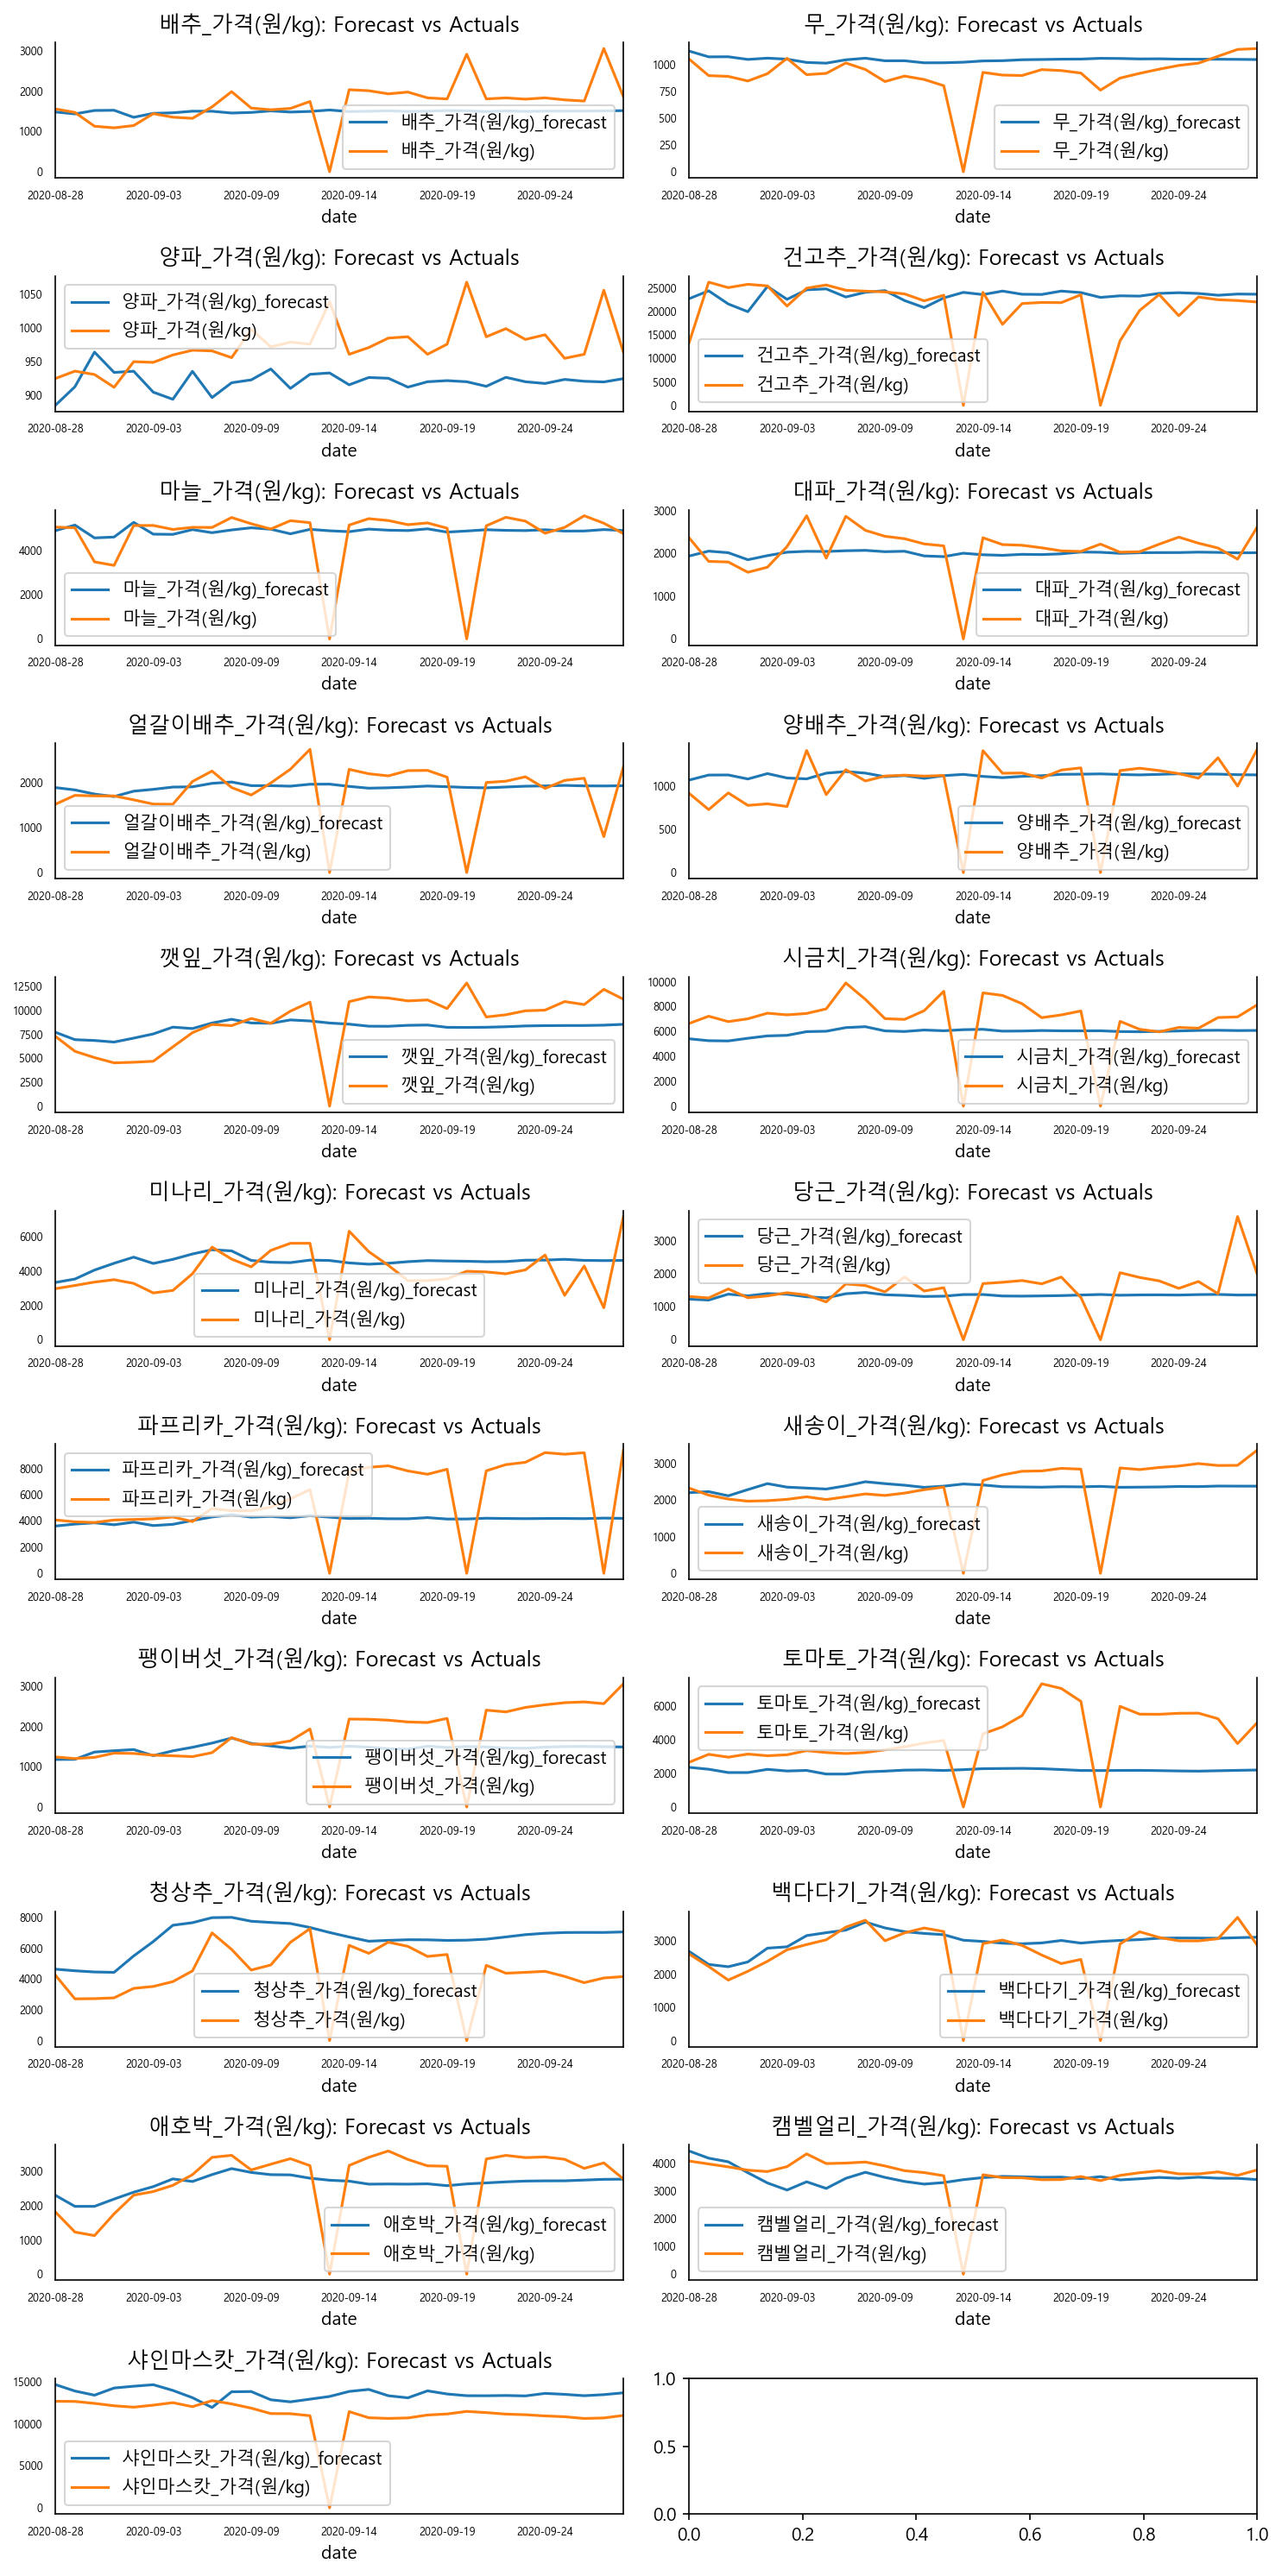

In [20]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2)+1, ncols=2, dpi=150, figsize=(10,20))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [21]:
from tqdm import tqdm

unique_pum = [
    '배추', '무', '양파', '건고추','마늘',
    '대파', '얼갈이배추', '양배추', '깻잎',
    '시금치', '미나리', '당근',
    '파프리카', '새송이', '팽이버섯', '토마토',
]

unique_kind = [
    '청상추', '백다다기', '애호박', '캠벨얼리', '샤인마스캇'
]

submission = pd.read_csv('sample_submission.csv')
public_date_list = submission[submission['예측대상일자'].str.contains('2020')]['예측대상일자'].str.split('+').str[0].unique()
# ['2020-09-29', ...]

for date in tqdm(public_date_list) :
    test = pd.read_csv(f'./data/public_data/test_files/test_{date}.csv')
    for pum in unique_pum + unique_kind:
        # 예측기준일에 대해 전처리
        temp_test = pd.DataFrame([{'date' : date}]) #예측기준일
        alldata = pd.concat([train, test, temp_test], sort=False).reset_index(drop=True)
        alldata = alldata[['date', f'{pum}_거래량(kg)', f'{pum}_가격(원/kg)']].fillna(0)
        alldata = alldata.iloc[-28:].reset_index(drop=True)
        alldata = preprocessing(alldata, pum, len_lag=28)
        temp_test = alldata.iloc[-1].astype(float)
        
        # 개별 모델을 활용하여 1,2,4주 후 가격 예측
        for week_num in [1,2,4] :
            temp_model = model_dict[f'{pum}_model_{week_num}']
            result = temp_model.predict(temp_test)
            condition = (submission['예측대상일자']==f'{date}+{week_num}week')
            idx = submission[condition].index
            submission.loc[idx, f'{pum}_가격(원/kg)'] = result[0]

ModuleNotFoundError: No module named 'tqdm'